<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Logo_UTFSM.png/250px-Logo_UTFSM.png style="float:right;height:90px">
<img src=http://carla2014.ccarla.org/img/logo_DI_UTFSM.jpg style="float:left;height:90px">
<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Actividad 7 </h2> 
</center>

<center>    
    Roberto Felipe Fuentes Zenteno - `roberto.fuentes@alumnos.usm.cl`.
</center>

In [33]:
import numba
import numexpr as ne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, fixed
import warnings

En la presente actividad simularemos y visualizaremos un sistema dinámico 2-dimensional simple. Para ello resolveromos una EDO numéricamente, utilizando el _método de Euler_. 

Consideremos un sistema de $N$ partículas $(x_i(t), y_i(t))$ en el dominio $[0,1]\times[0,1]$, cuyo movimiento se rige por las siguientes ecuaciones (EDOs autónomas):

\begin{align}
\frac{dx}{dt} &= \text{tanh}(x^2+y^2), \text{ con } x(0)=x_0, \\
\frac{dy}{dt} &= \text{tanh}(x^2+y^2), \text{ con } y(0)=y_0 \\
\end{align}

El _método de Euler_ para resolver este problema numéricamente, consiste en realizar la siguiente aproximación para la derivada:

\begin{align}
\frac{x_{i+1}-x_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow x_{i+1} = x_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2) \\
\frac{y_{i+1}-y_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow y_{i+1} = y_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2)
\end{align}

ocupando las condiciones iniciales $x_0$ e $y_0$ como puntos de partida. Aquí $\Delta t$ (_time step_) es un parámetro definido por usted, y usualmente toma valores pequeños.

__Notar__ que esta ecuación es válida para una partícula, y por tanto para simular un sistema de $N$ de estas, es necesario realizar esta actualización para cada partícula $(x_i,y_i)$ con $i \in [1,N]$.

__Se solicita que realice lo siguiente__:
1. Genere un conjunto de `100` puntos aleatoriamente distribuidos en el espacio $[0,1]\times[0,1]$ (Seran usados como posiciones iniciales del sistema). Grafíque el conjunto de puntos obtenidos.
2. Realizar un gráfico de la función que define el comportamiento del sistema: $f(z) = \text{tanh}(z^2)$ (gráfico unidimensional).
3. Desarrollar la función `simular(x0, y0, dt, tf)` que reciba los `np.ndarray` con las coordenadas iniciales `x0` e `y0` del sistema, el _time step_ `dt` (seleccione un valor pequeño $\sim 0.01$) y el tiempo final de simulación. Esta función debe graficar el conjunto de puntos del sistema, en su tiempo final.
4. Usando `interact` desarrolle un _widget_ para visualizar interactivamente distintos estados finales del sistema (distintos `tf`).

## Desarrollo

### Pregunta 1

In [34]:
#Se crean 100 puntos uniformes de 0 a 1
x = np.random.uniform(0,1,100)
y = np.random.uniform(0,1,100)

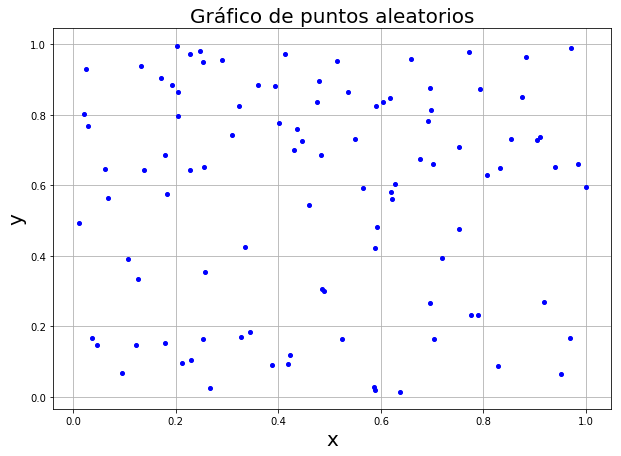

In [35]:
#grafico de puntos anteriormente creados
plt.figure(figsize=(10,7))
plt.plot(x, y, 'o', lw=2, color='blue', ms=4)
plt.title("Gráfico de puntos aleatorios",fontsize=20)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.grid()
plt.show()

### Pregunta 2

In [36]:
#Se define la funcion de tangente
def f(z):
    return np.tanh(z**2)

In [37]:
#se crean puntos a evaluar para la funcion f(z**2)
z = np.random.uniform(0,1,100)

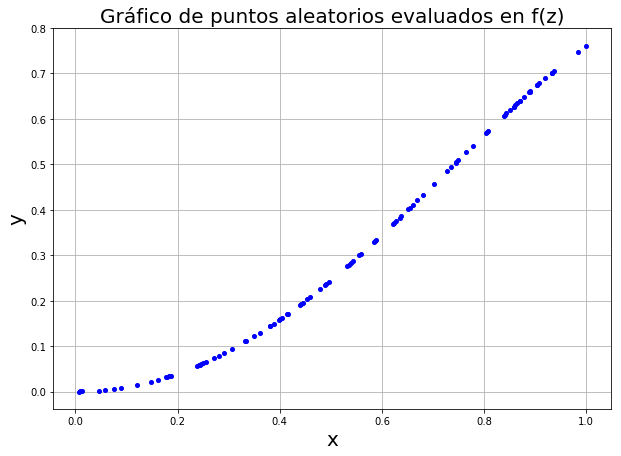

In [38]:
#Se grafica la funcion f(z)
plt.figure(figsize=(10,7))
plt.plot(z, f(z), 'o', lw=2, color='blue', ms=4)
plt.title("Gráfico de puntos aleatorios evaluados en f(z)",fontsize=20)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.grid()
plt.show()

### Pregunta 3

In [39]:
#Se define la funcion que calcula las 2 derivadas.
def F(values):
    return np.array([np.tanh(values[0]**2 + values[1]**2), np.tanh(values[0]**2 + values[1]**2)])

#Se crea la funcion simular, que grafica los puntos finales de un arreglo inicial de datos.
def simular(x0, y0, dt, tf):
    #initial_guess a actualizar
    initial_guess = [x0,y0]
    #discretizamos el espacio n puntos de 0 a tf, ya que conocemos los valores en ese extremo.
    #Calculamos los puntos a discretizar como (tf - ti)/dt + 1, donde ti es 0 y tf, dt son parametros.
    points = int(tf/dt) + 1
    #creamos la discretizacion
    time_grid = np.linspace(0,tf,points)
    for i in range(len(time_grid)-1):
        #definimos un h pequeño, el cual sera los espacios entre punto y punto de nuestra discretización.
        h = time_grid[i+1] - time_grid[i]
        #actualizamos el vector con el metodo de euler.
        initial_guess = initial_guess + h*F(initial_guess)
    plt.figure(figsize=(10,5))
    plt.plot(initial_guess[0], initial_guess[1], 'o', color='b')
    plt.xlabel("x",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.grid()
    plt.title("Grafico de derivadas en el punto tf = " + str(tf),fontsize=20)
    plt.show()
warnings.filterwarnings("ignore")

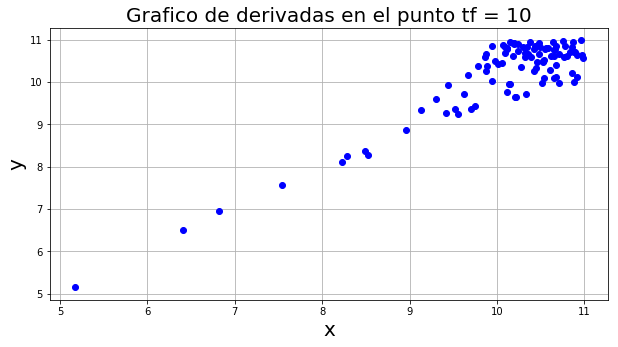

In [40]:
#Parametros necesarios
_dt = 0.01
_tf = 10

simular(x,y,_dt,_tf)

### Pregunta 4

In [41]:
#Ponemos como parametro del intersct el tf desde 0 (caso inicial) a 10:
interact(simular, x0=fixed(x), y0=fixed(y), dt=fixed(_dt), tf=(0,10));